### Disk UME Iss

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
%matplotlib inline

In [42]:
import pandas as pd   #use python 3.7.4, not 3.9
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
%matplotlib inline

In [48]:
filepath = "/Volumes/NO NAME/2025.02.20-Au ume CLEAN/FcMeOH/data"
savepath = "/Volumes/NO NAME/2025.02.20-Au ume CLEAN/FcMeOH/figure"
savepath = savepath + "/"
fileList = os.listdir(filepath);
filtered_files = [file for file in fileList if not file.startswith('._')]
fileList = filtered_files
num_list = len(fileList);

In [49]:
filtered_files

['CAM, 2 mM Fc 0.1 M PB, 100 mVs.txt',
 'FRB, 2 mM Fc 0.1 M PB, 100 mVs.txt',
 'IB1CK, 2 mM Fc 0.1 M PB, 100 mVs.txt',
 'IB2CE, 2 mM Fc 0.1 M PB, 100 mVs.txt',
 'IB2CK-TCEP, 2 mM Fc 0.1 M PB, 100 mVs.txt',
 'IB2CK, 2 mM Fc 0.1 M PB, 100 mVs.txt']

In [50]:
#solution information
C = 2 # mM, concentration of FcMeOH
n = 1 #number of electron transfer
D = 7.8e-6 #FcMeOH
F = 96485.3329
#r_ume = np.sqrt(27.7/3.14) #um
#Iss = 0.8 #nA

In [51]:
filename = filepath  + "/" + fileList[0]
CV = pd.read_csv(filename, header = None,sep = '\t');

test [ 19 288 326]
Iss =  3.7179071916071136 nA in 2 mM FcMeOH
r_ume = 6.17522313791434 um
test [ 19 288 326]
Iss =  2.6730457260930915 nA in 2 mM FcMeOH
r_ume = 4.43977027014972 um
test [ 19 288 325]
Iss =  5.955349540627997 nA in 2 mM FcMeOH
r_ume = 9.891482057613388 um
test [ 19 288 326]
Iss =  6.1859745487857065 nA in 2 mM FcMeOH
r_ume = 10.274536505495279 um
test [ 19 289 327]
Iss =  8.515065341972447 nA in 2 mM FcMeOH
r_ume = 14.143018050397137 um
test [ 19 289 327]
Iss =  8.249587436573274 nA in 2 mM FcMeOH
r_ume = 13.702075009181156 um


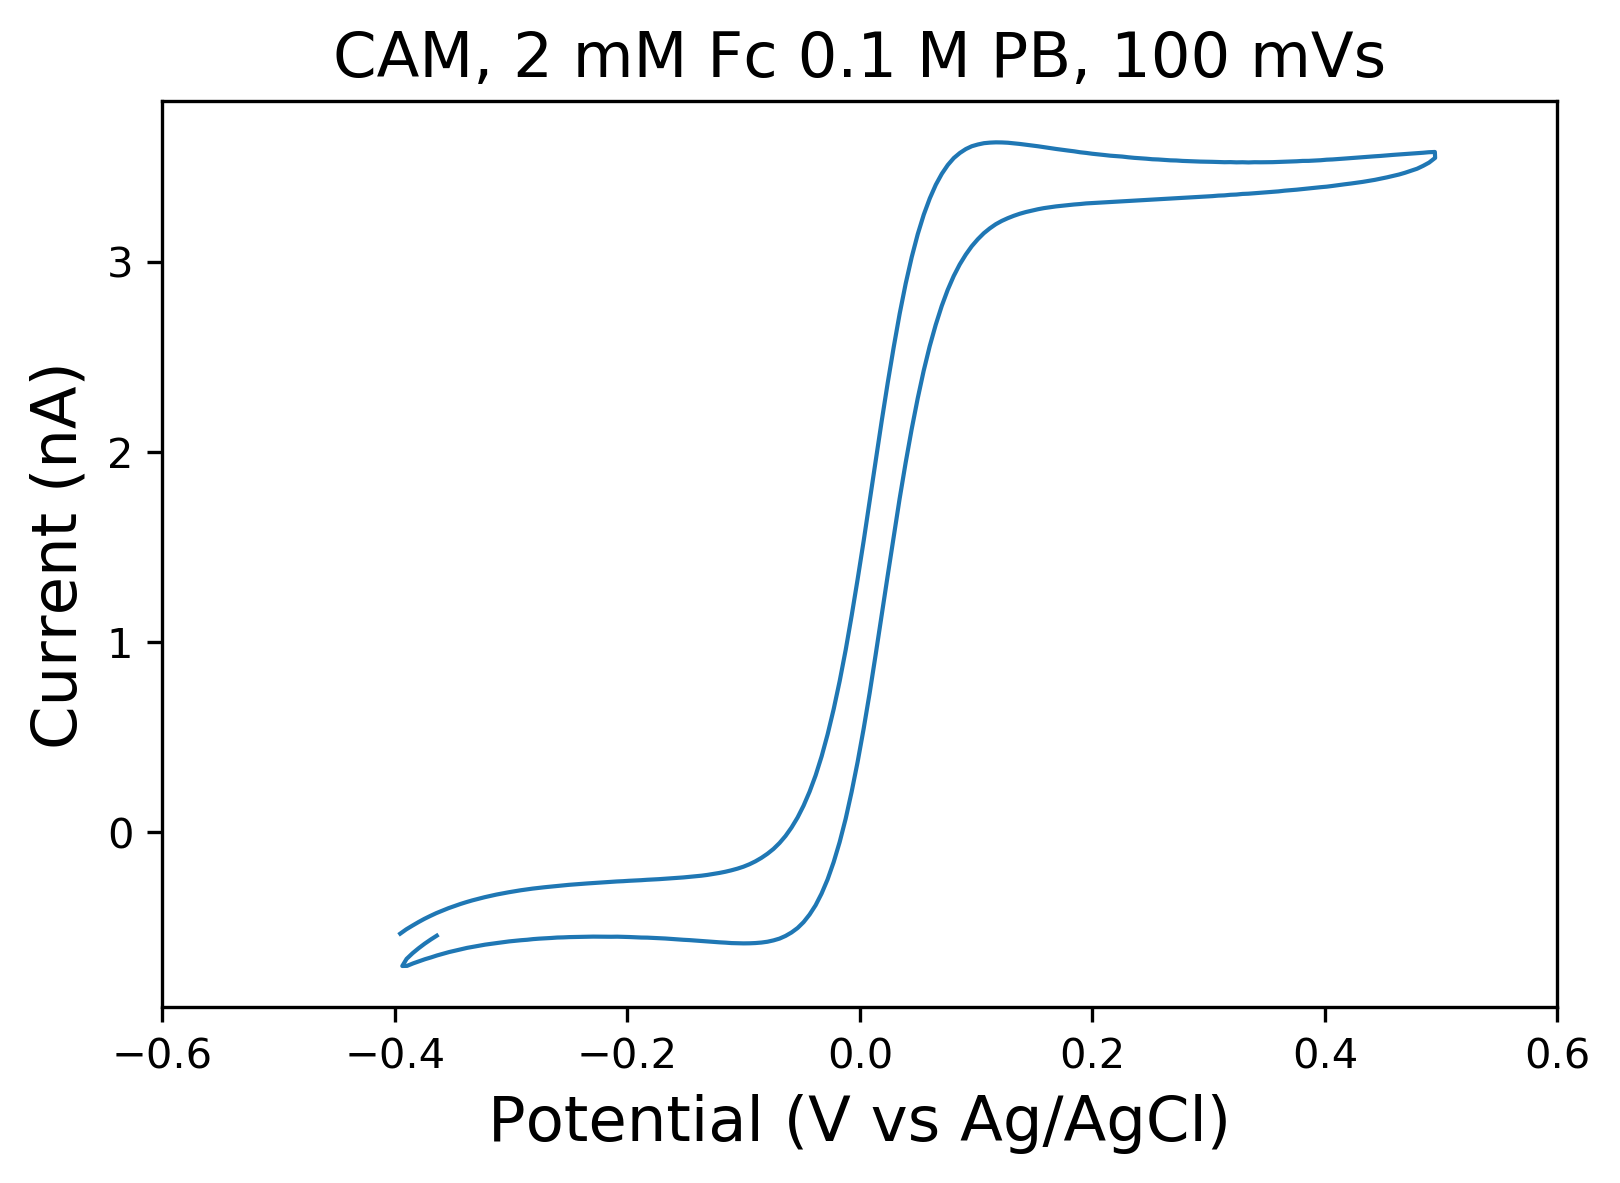

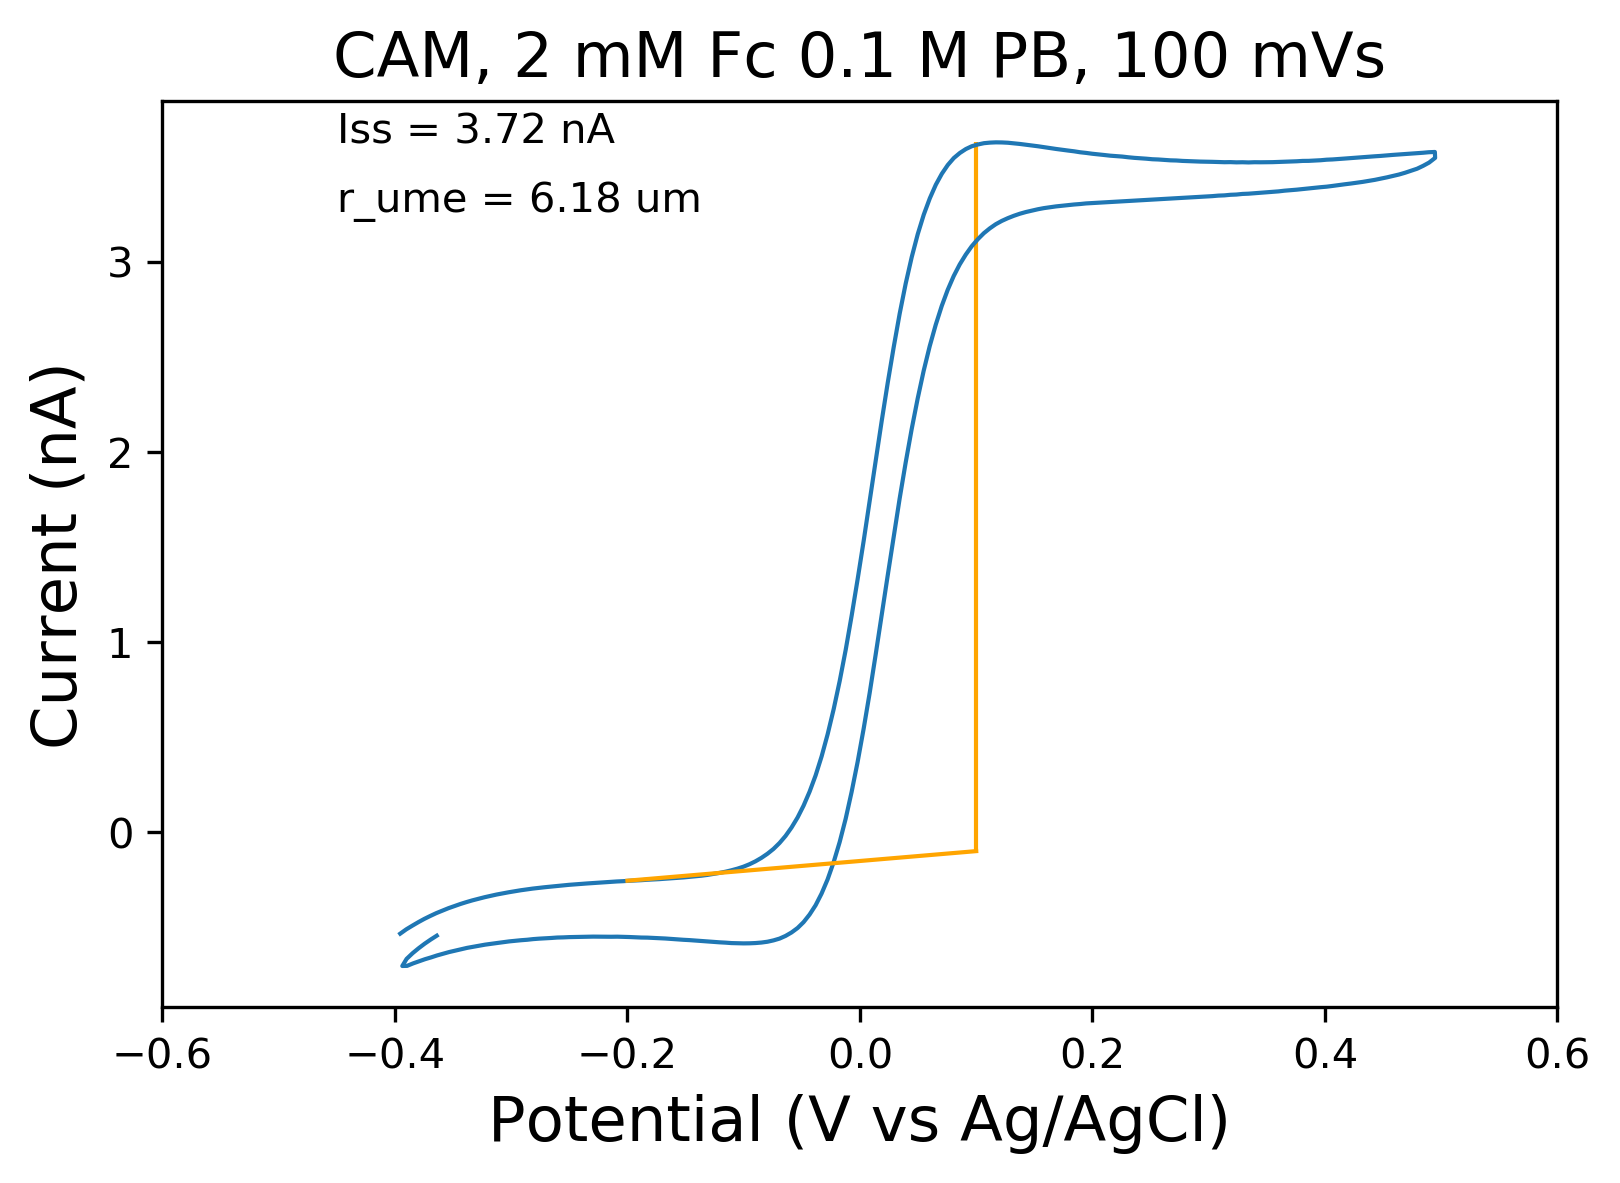

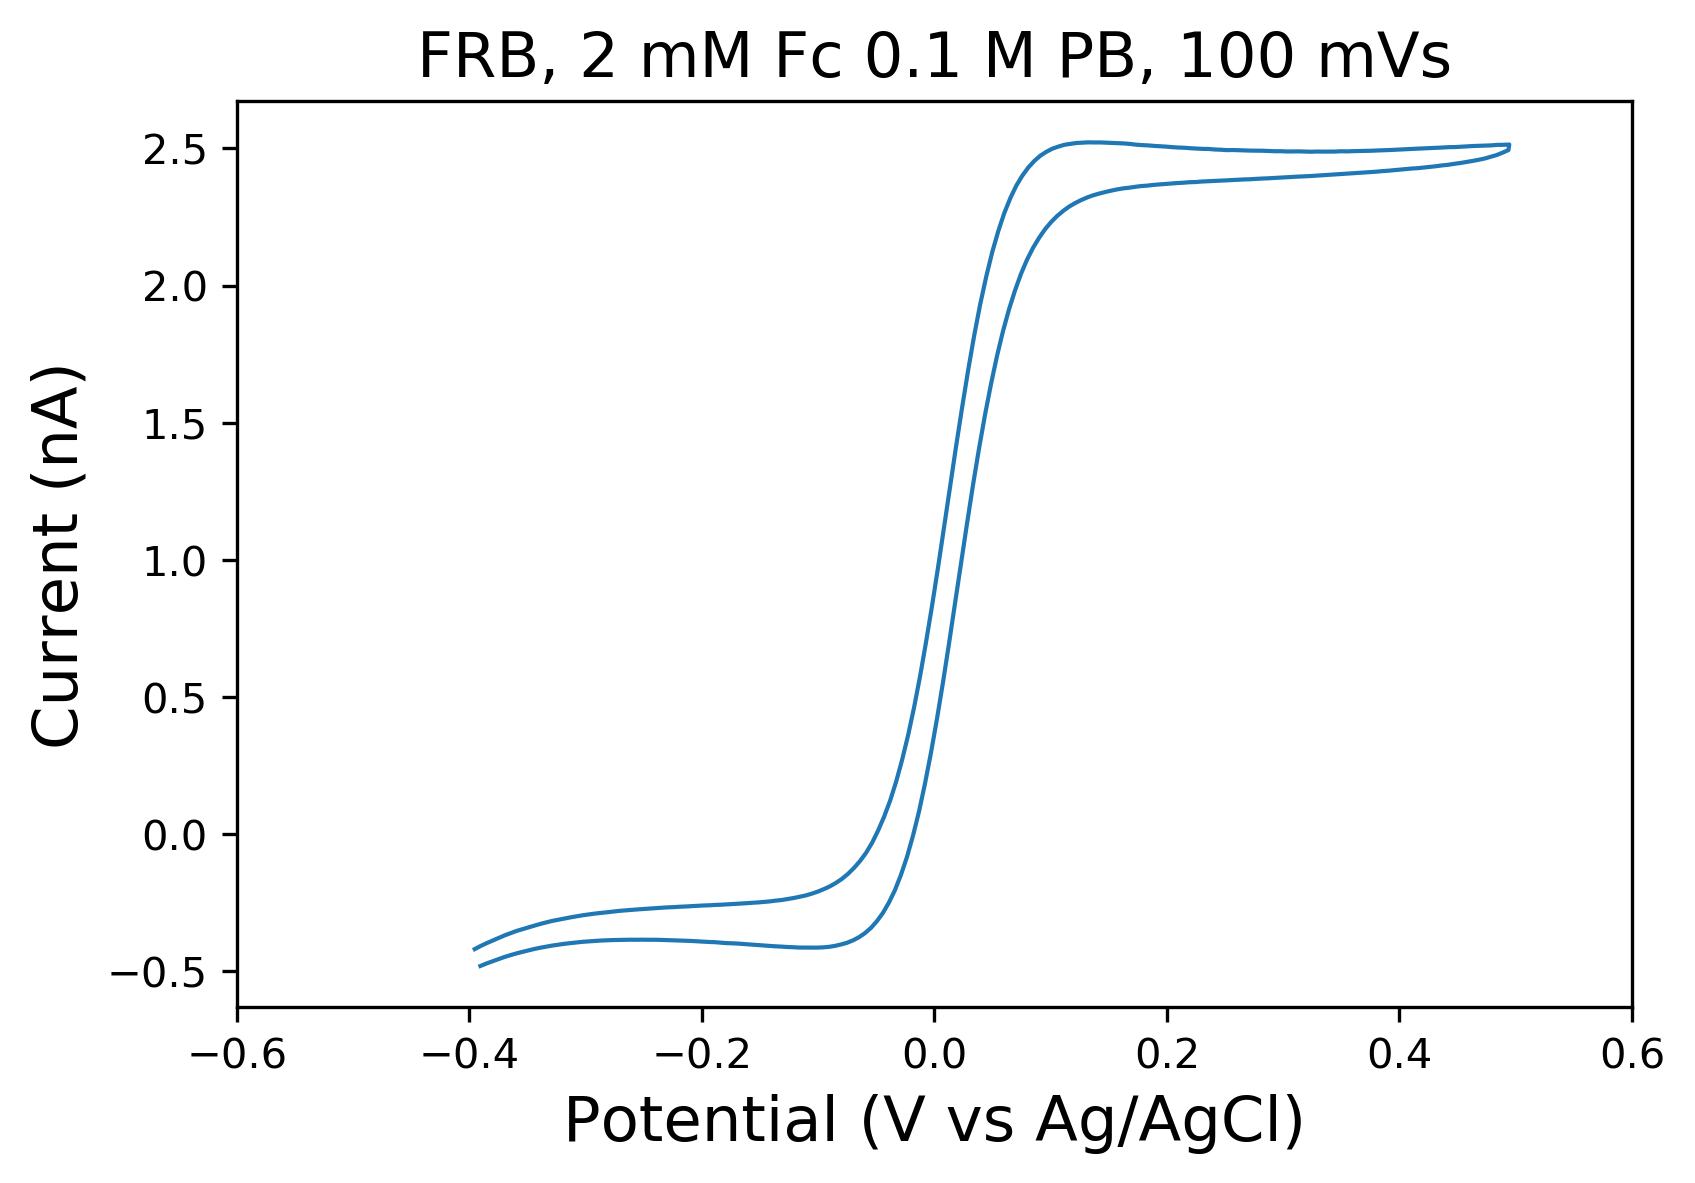

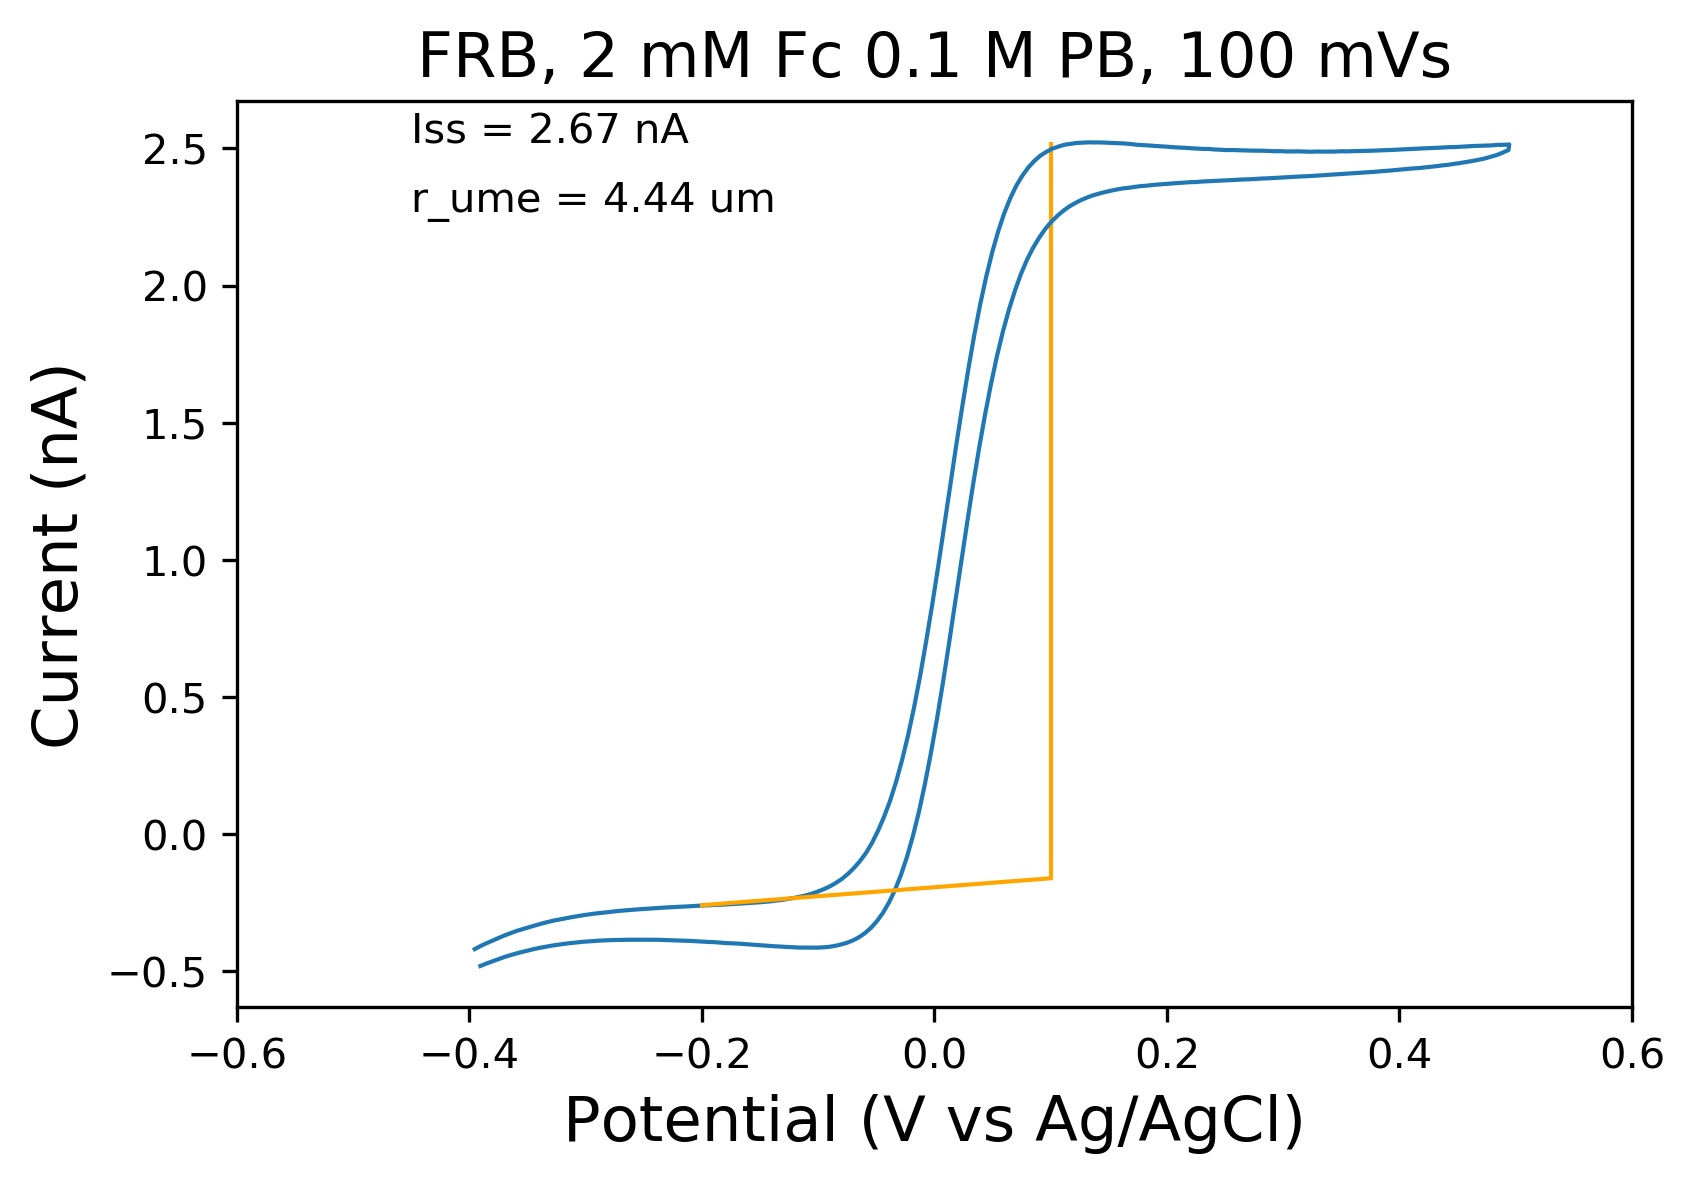

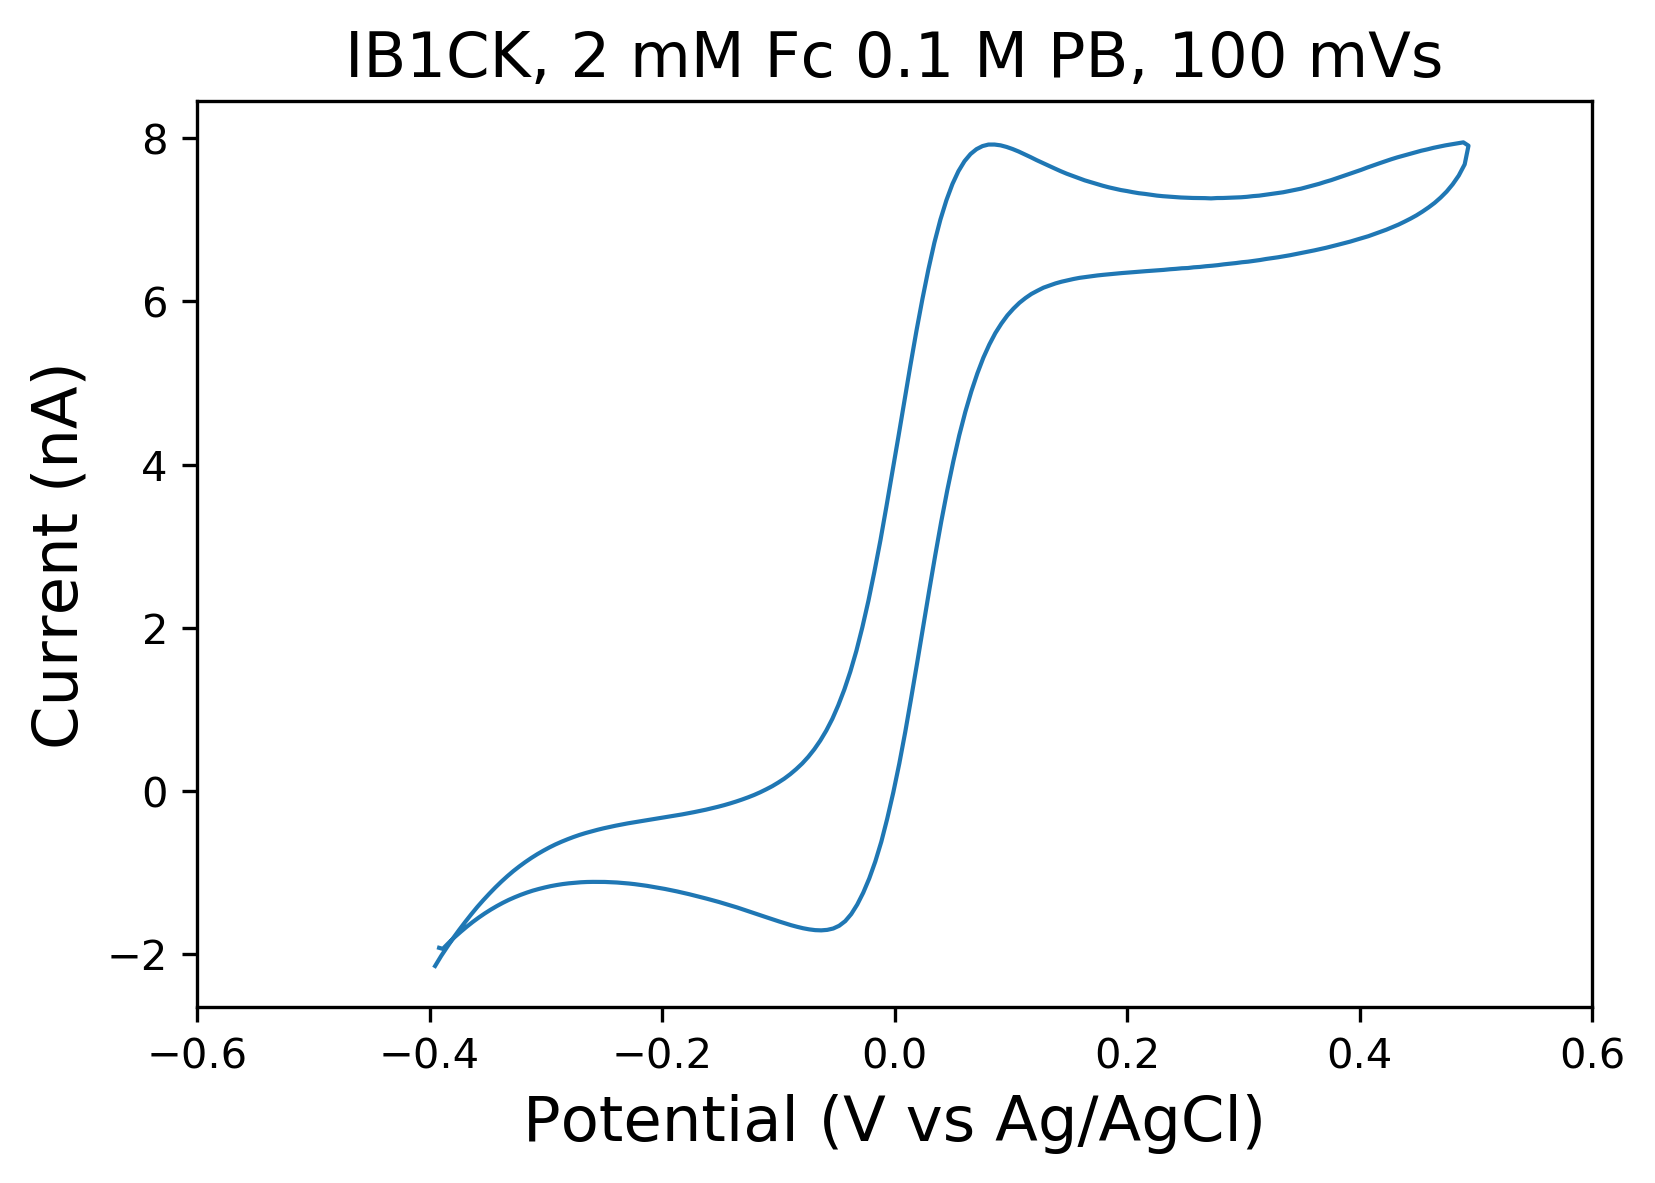

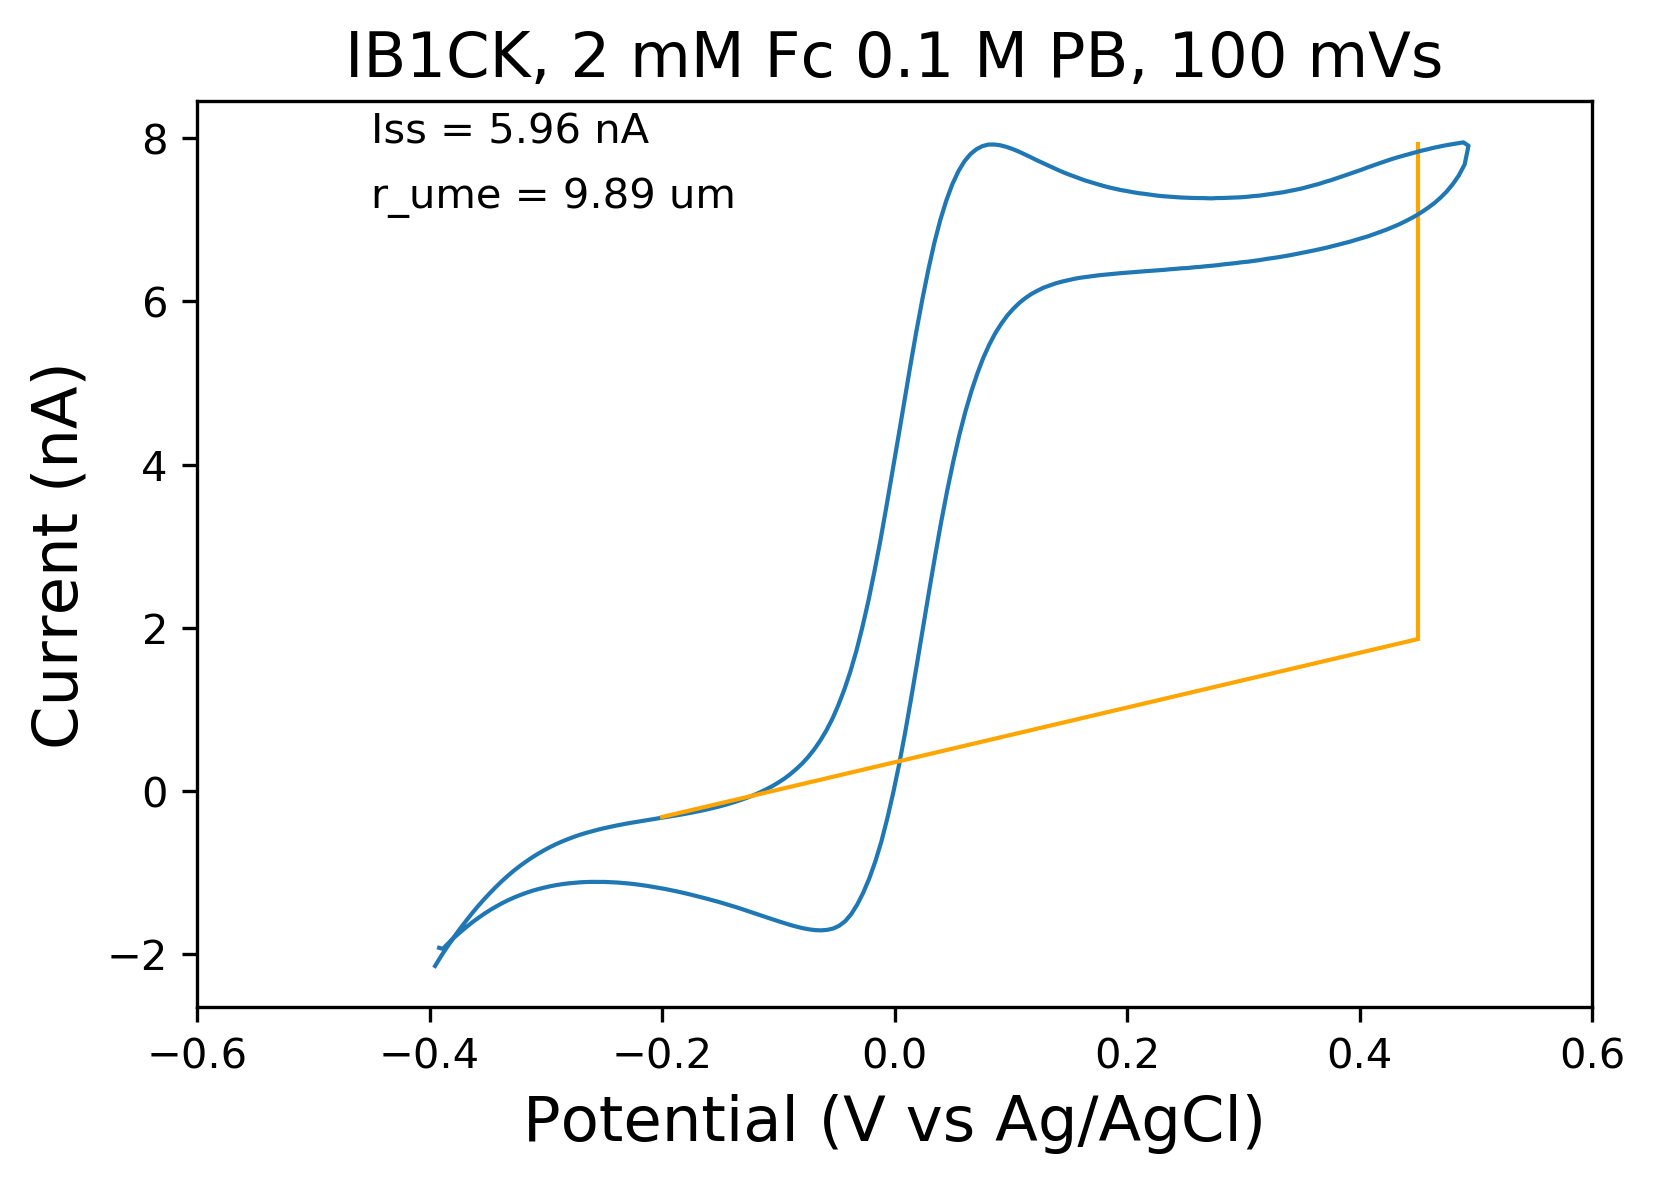

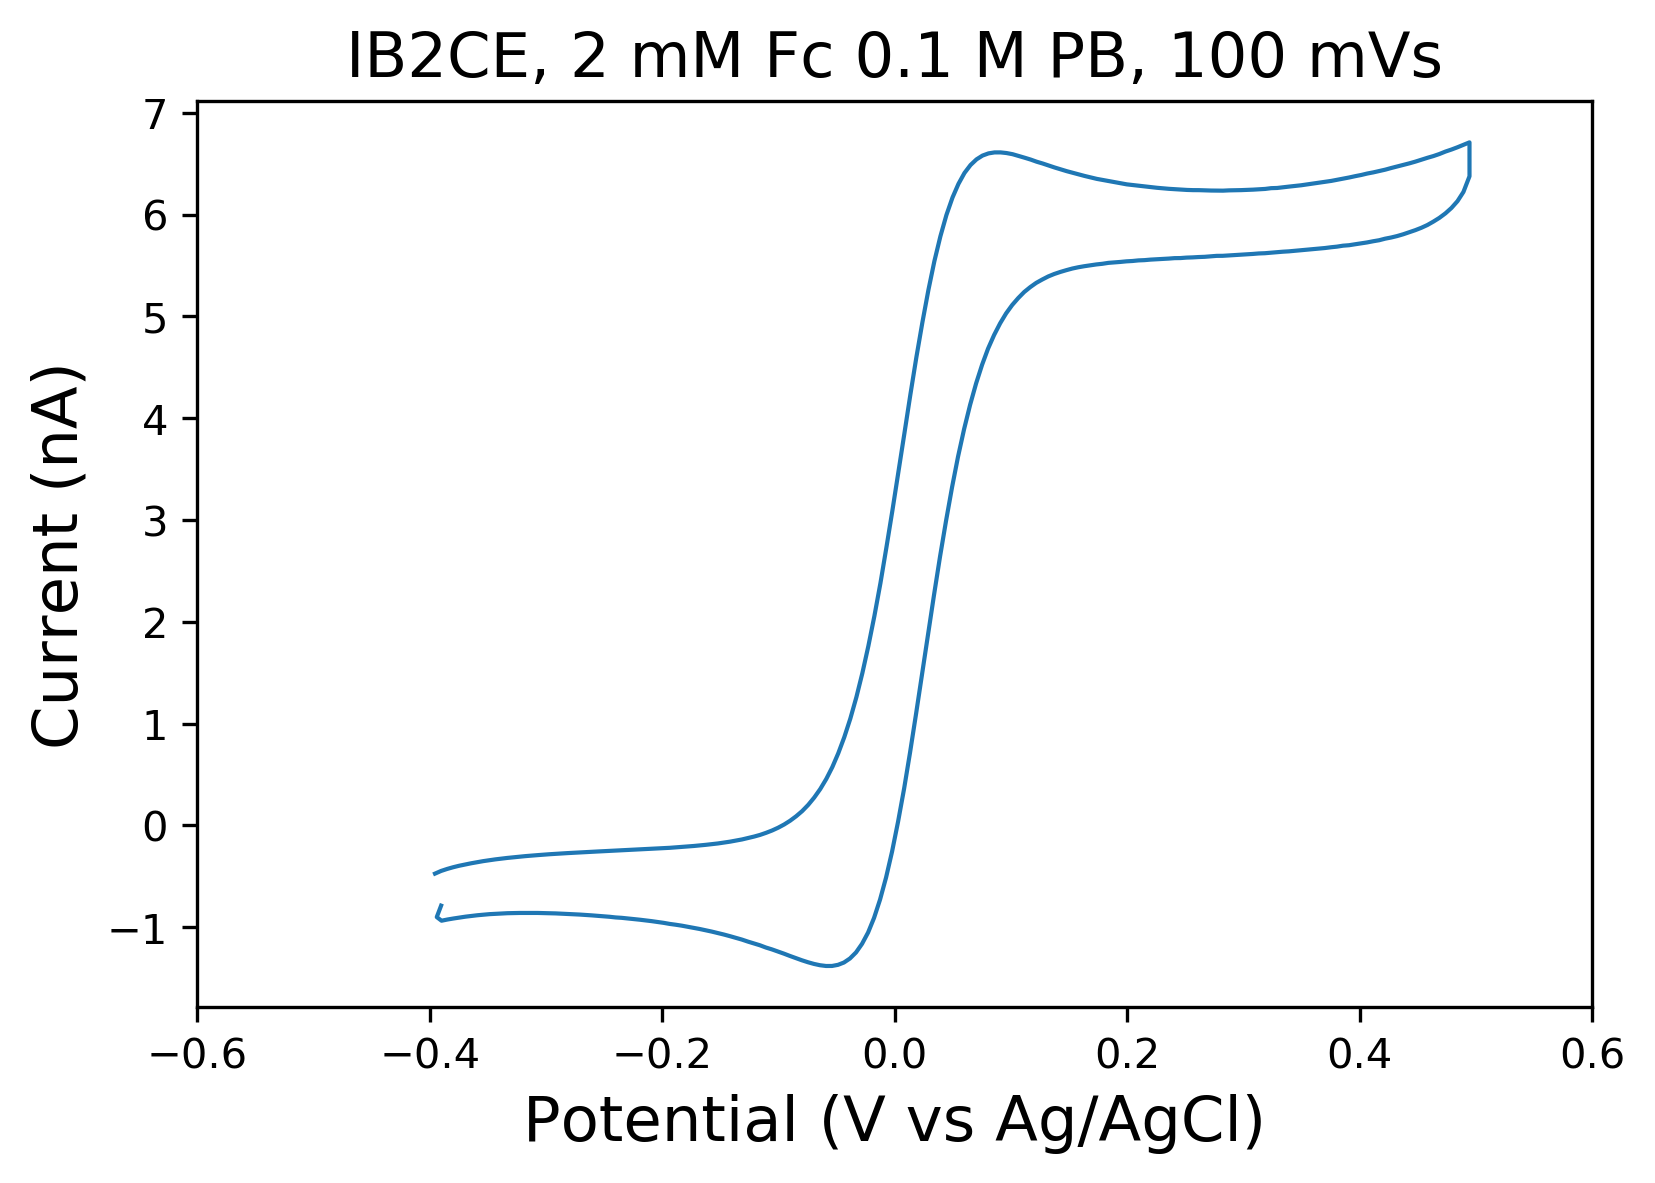

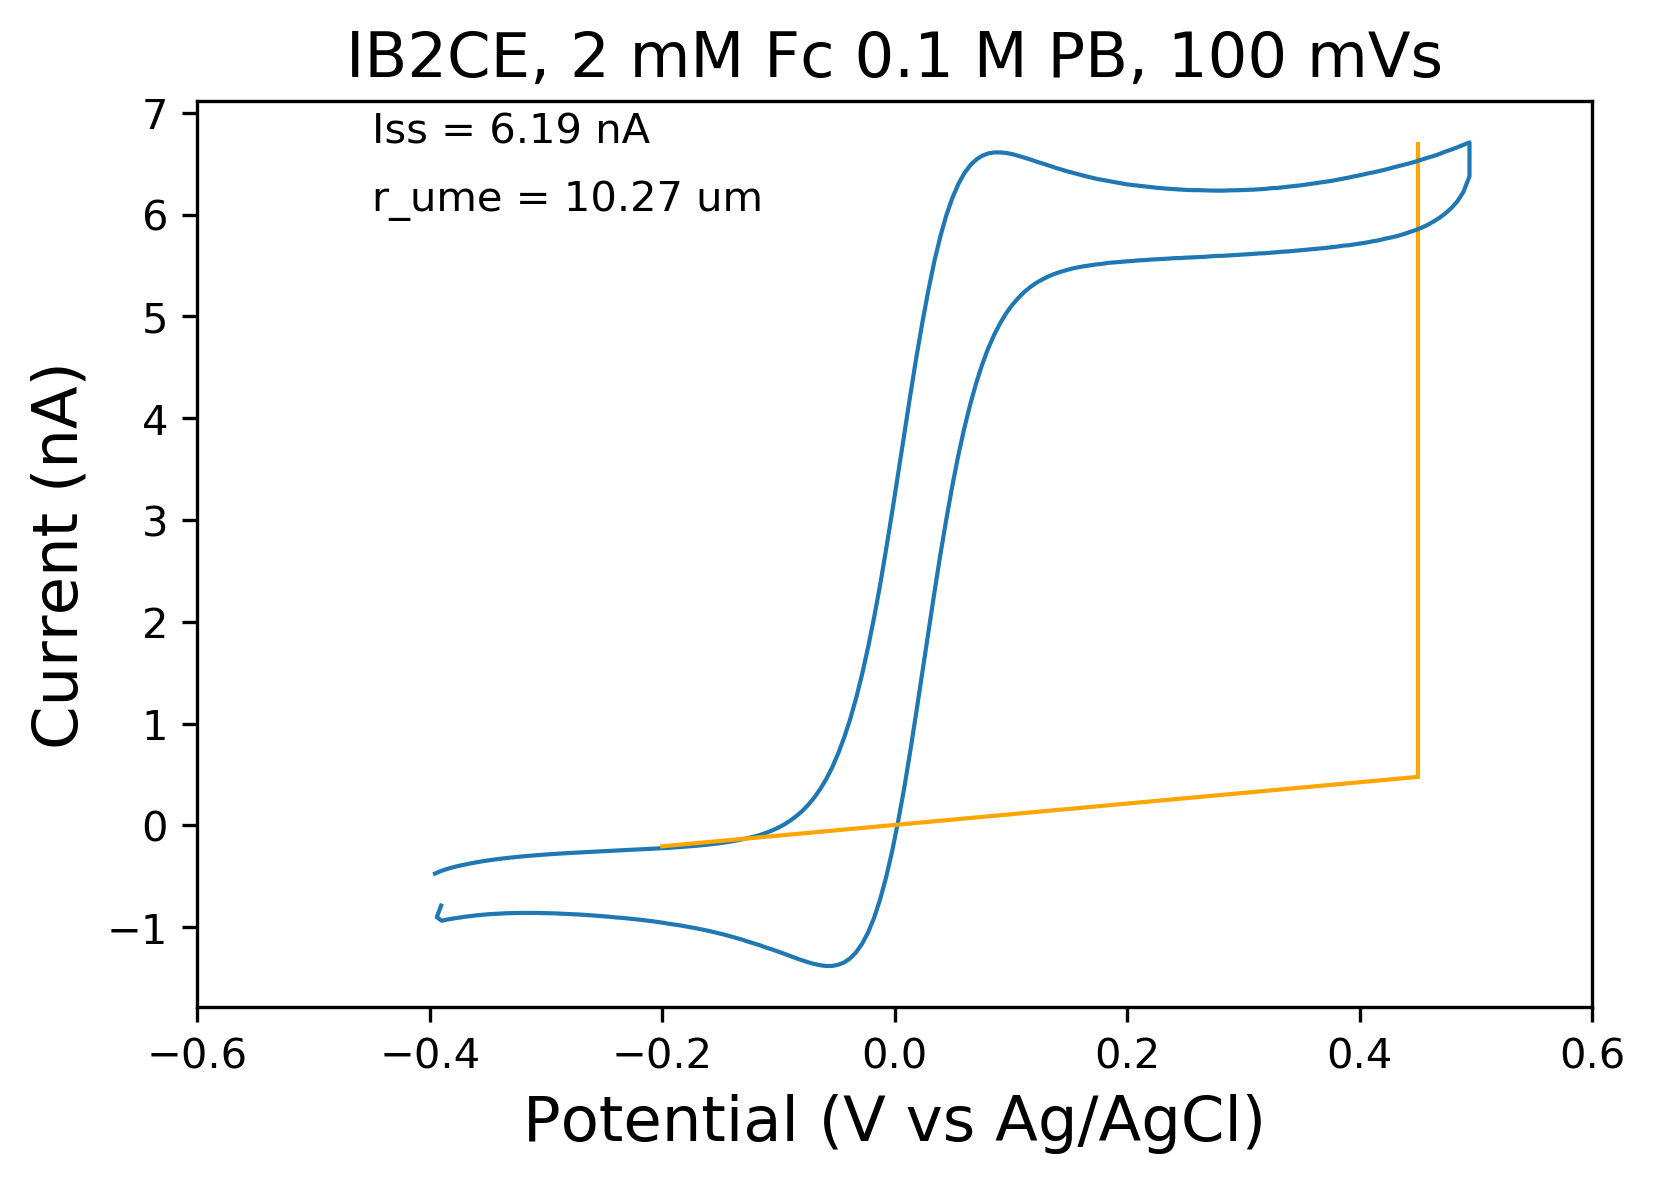

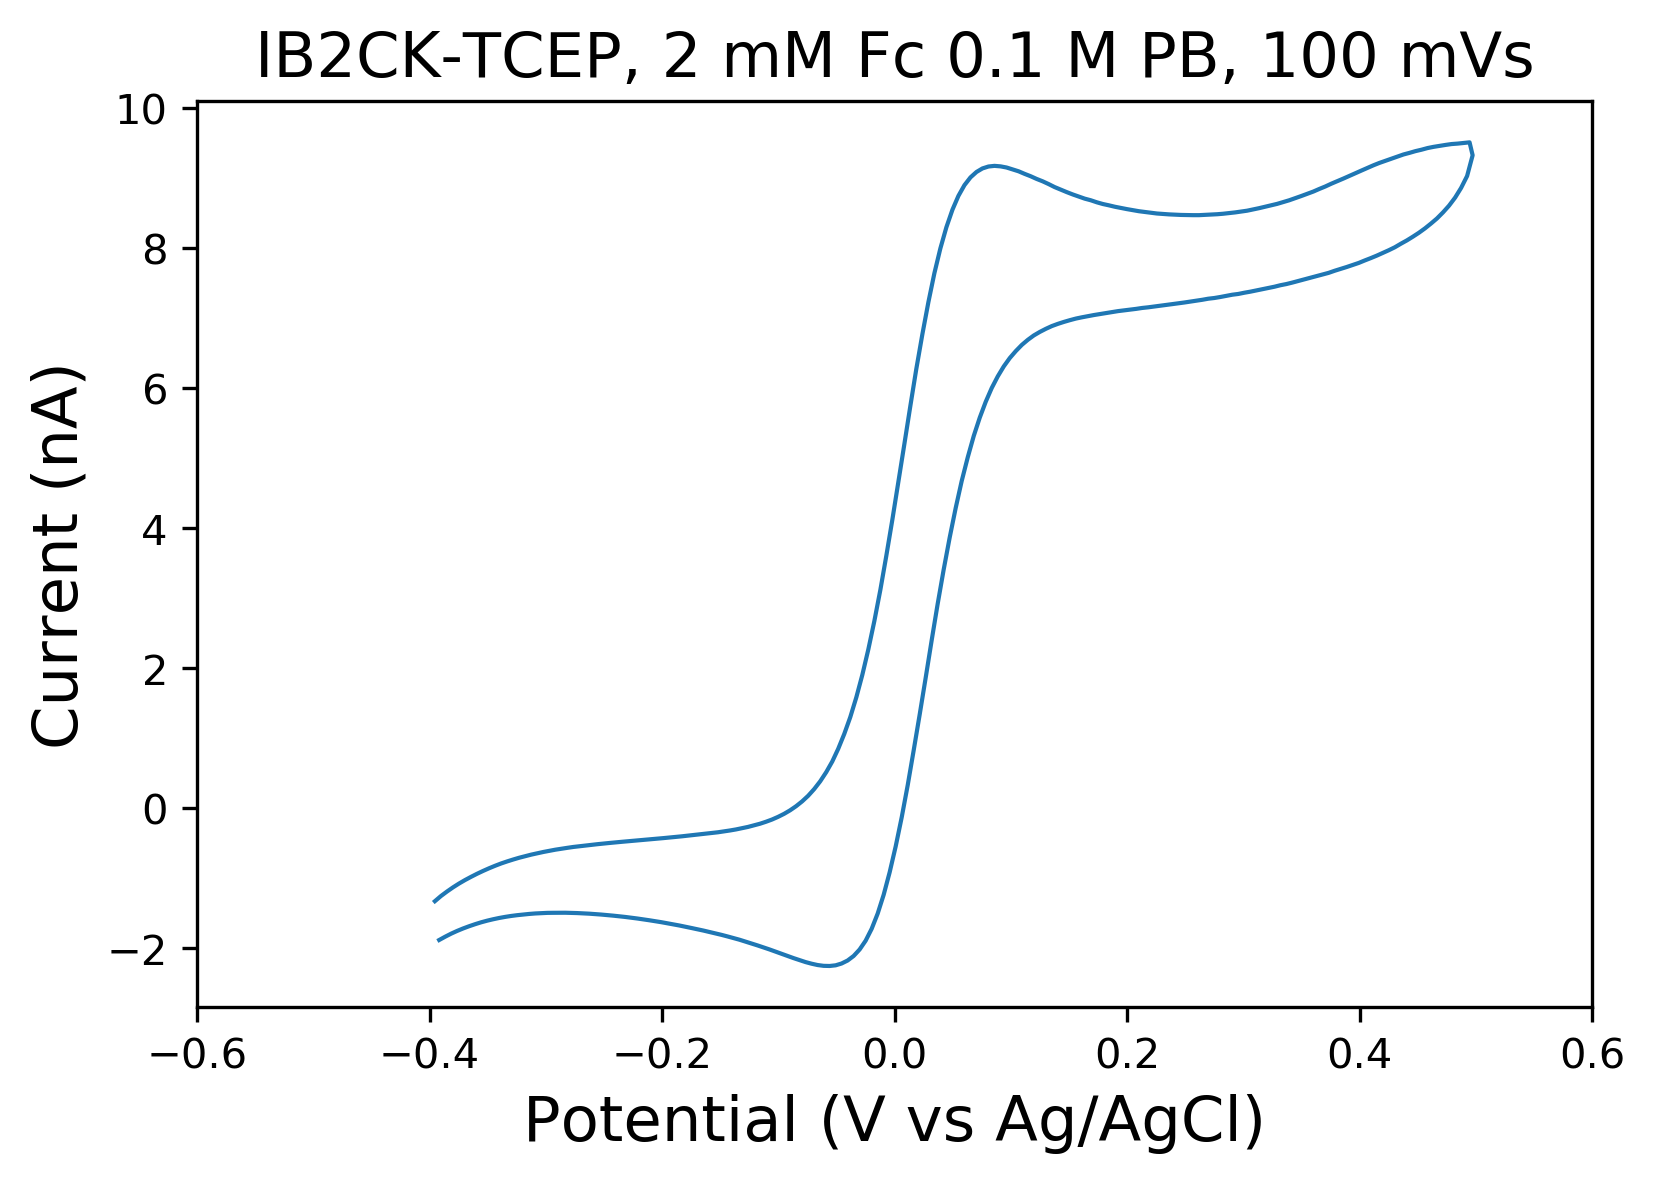

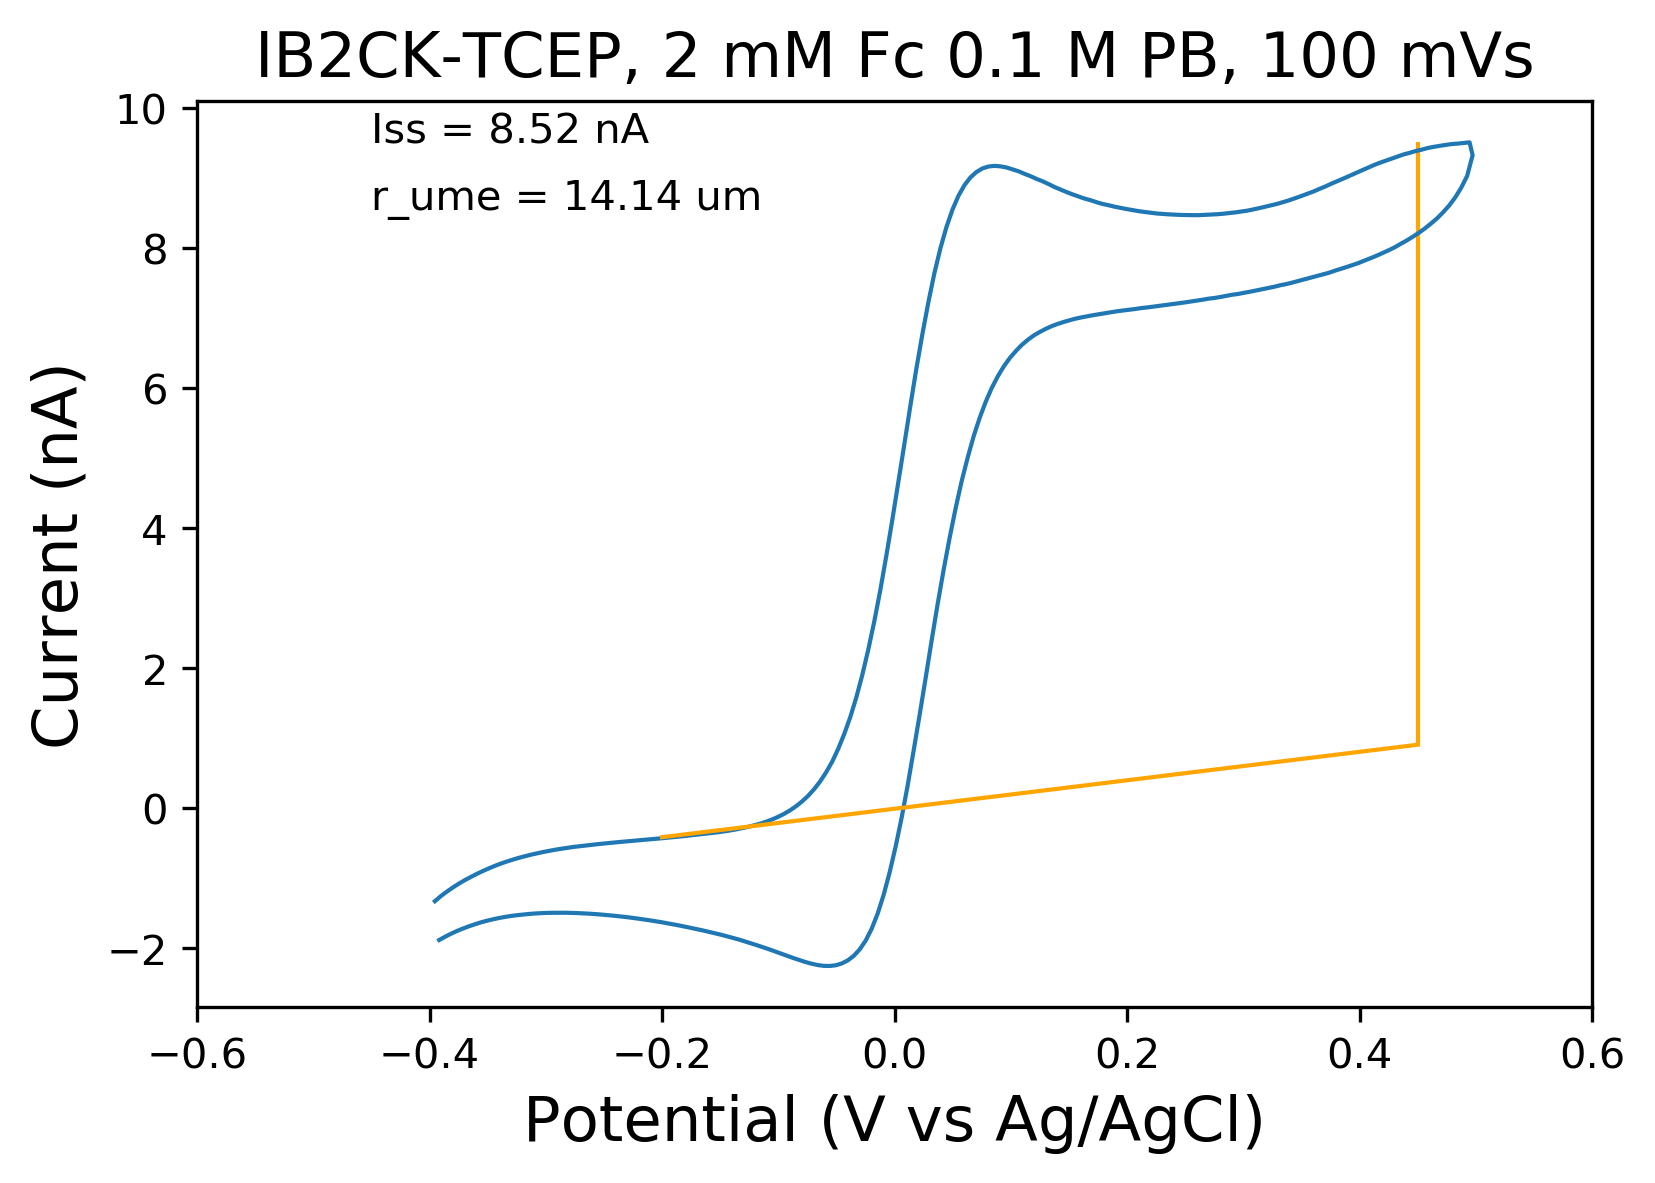

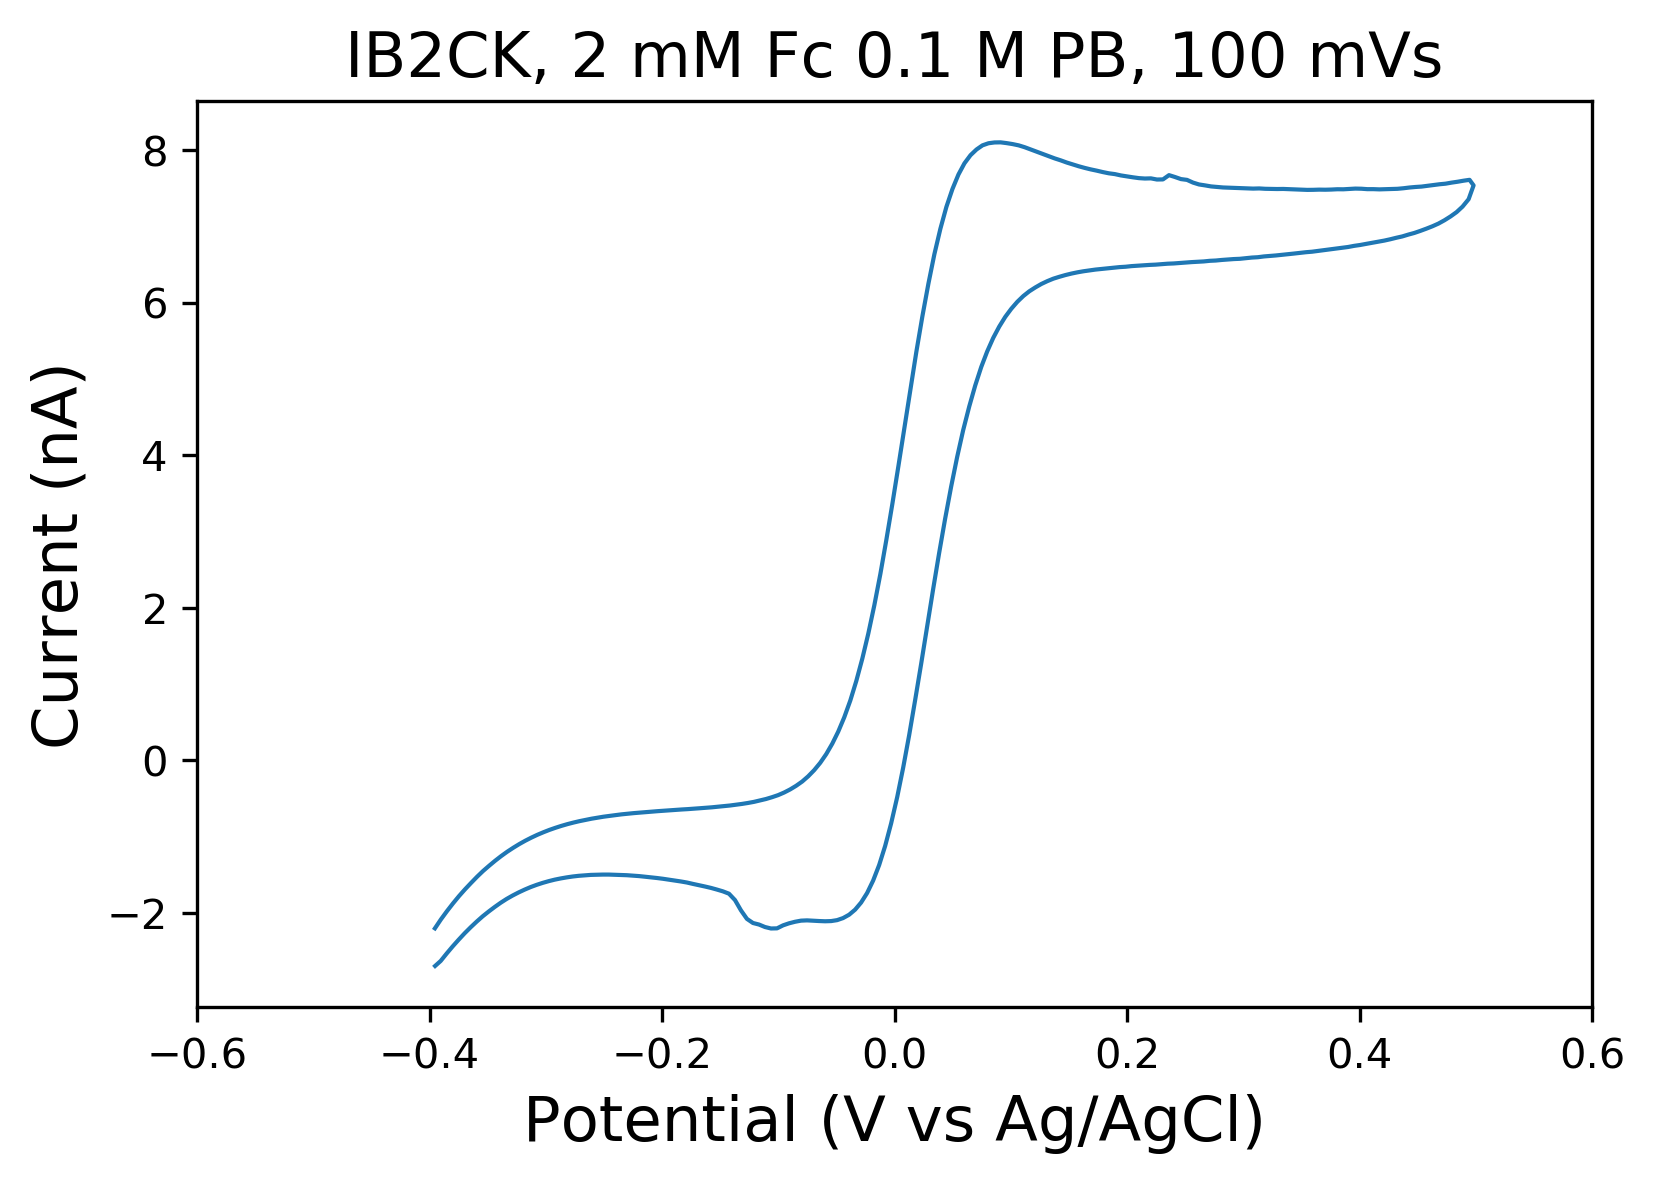

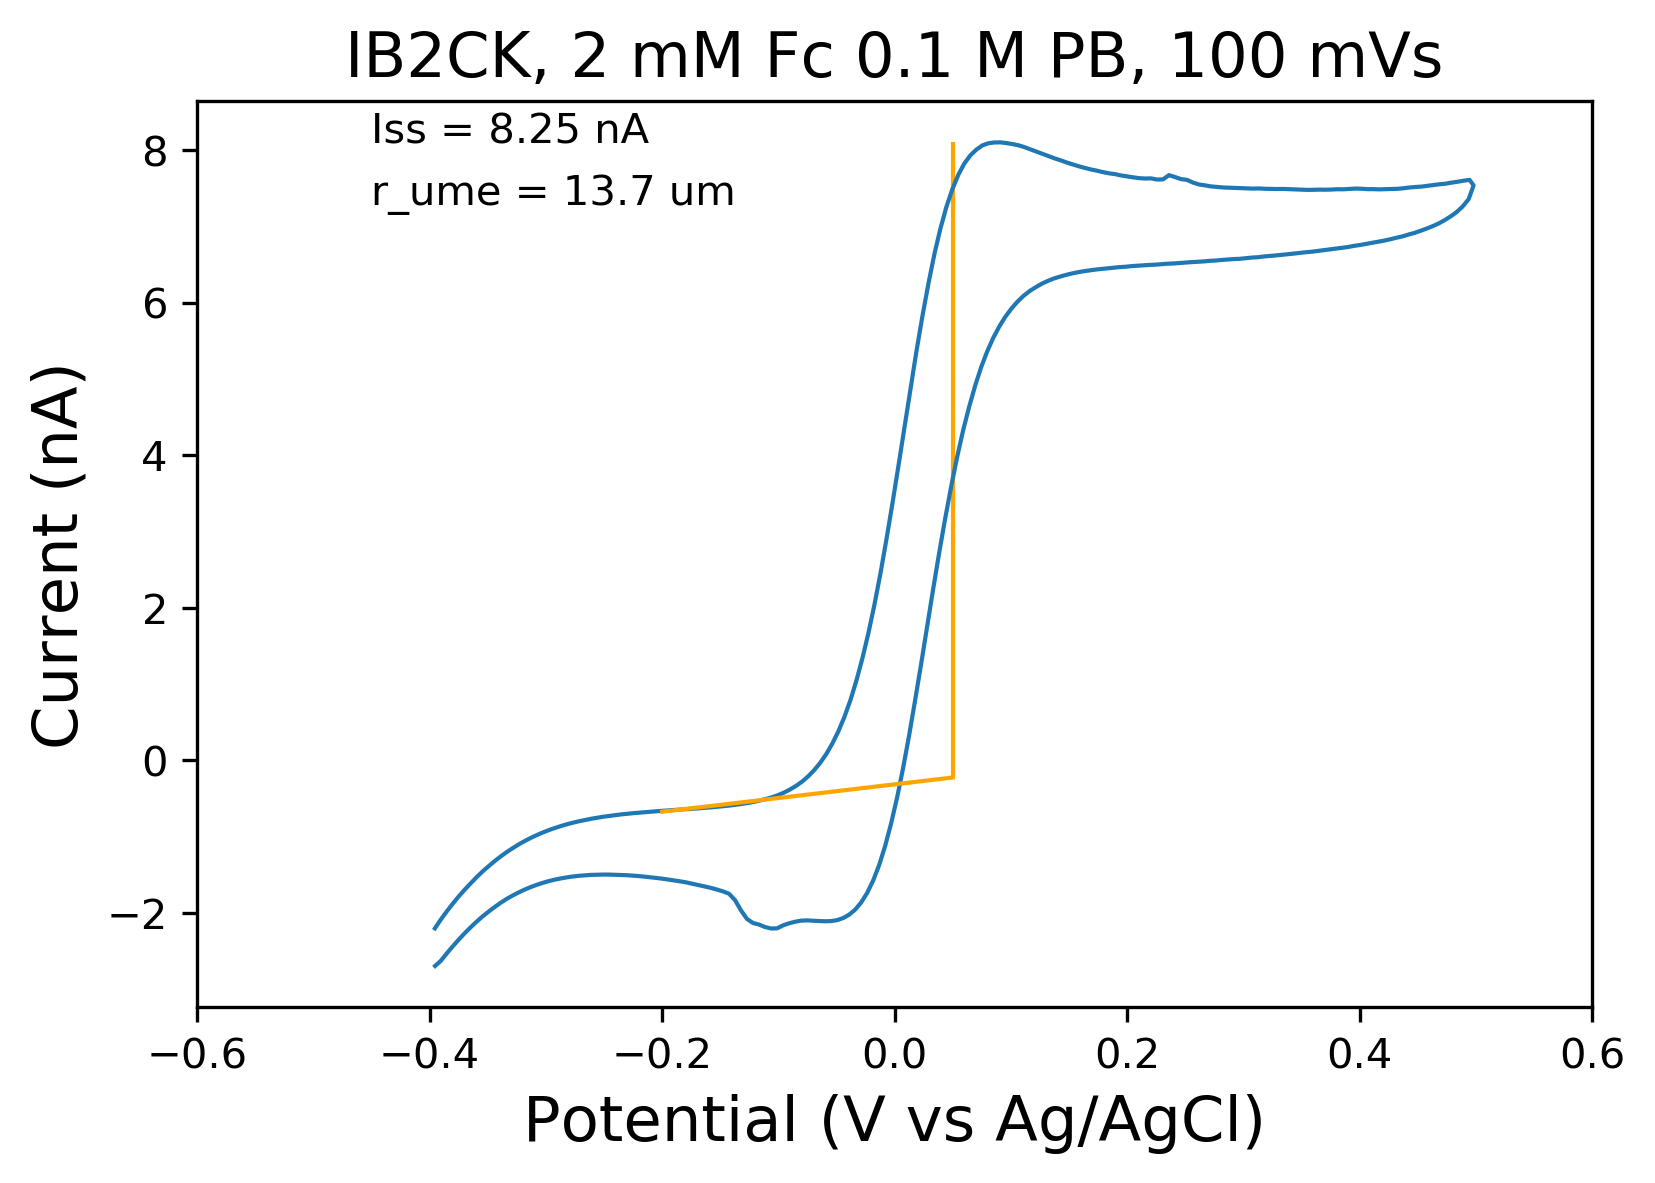

In [53]:
k = 0
for j in range(num_list):
    filename = filepath  + "/" + fileList[j];
    #CV = pd.read_csv(filename, header = None,sep = '\t', names=['V', 'nA']);
    #CV = CV.drop(columns = "index");
    CV = pd.read_csv(filename, header = None,sep = '\t', names=['index', 'V', 'nA']);
    CV = CV.drop(columns = "index");

    plt.figure(k, dpi = 300);
    plt.plot(CV.V, CV.nA, linewidth = 1);
    plt.xlabel("Potential (V vs Ag/AgCl)", fontsize = 15);
    plt.ylabel("Current (nA)", fontsize = 15);
    plt.title(fileList[j].split('.t')[0], fontsize = 15);
    plt.xticks(np.arange(-0.6,0.8,0.2))
    #save plot
    filename_fig = savepath + fileList[j].split('.t')[0]+ ".png";
    plt.savefig(filename_fig, bbox_inches = 'tight');

    #locate baseline

    base = CV[(CV["V"]> -0.3) & (CV["V"]<-0.1)]
    index_list = base["V"].index.to_list()

    #trim data locate in specific range
    index_point = [np.min(index_list)]
    for i in np.arange(0, len(index_list)-1):
        if index_list[(i+1)] - index_list[i] > 1:
            index_point = np.append(index_point, index_list[i+1])
    index_point = np.append(index_point, np.max(index_list))
    print("test",index_point)

    for i in np.arange(0, len(index_point)-1):
        trim_base = base.loc[index_point[i]:index_point[i+1]-1]
        if trim_base.V[index_point[i]] - trim_base.V[index_point[i]+1] < 0:
            baseline = trim_base

    #linear fit
    slope, intercept, r_value, p_value, stderr = linregress(baseline.V, baseline.nA)

    # max current
    peak = CV.loc[CV.nA == np.max(CV.nA)]

    base_current = slope*peak.V+intercept
    Iss = float(peak.nA - base_current)
    r = Iss/1000000000/(4*n*F*D*(C*1e-6))*1e+4 #um

    print("Iss = ", Iss, "nA in", C, "mM FcMeOH")
    print("r_ume =",r, "um")

    x = np.arange(-0.2, float(peak.V),0.05)
    y = slope*x+intercept
    plt.figure(k+1, dpi = 300);
    plt.plot(CV.V, CV.nA, linewidth = 1);
    plt.plot(x,y, linewidth = 1, color="orange")
    plt.vlines(np.max(x), ymin = y[-1], ymax = float(peak.nA), linewidth = 1, colors="orange")

    text1 = "Iss = "+ str(round(Iss,2)) + " nA"
    text2 = "r_ume = " + str(round(r,2)) +" um"
    plt.text(-0.45, peak.nA, text1)
    plt.text(-0.45, peak.nA-peak.nA*0.1, text2)
    plt.xticks(np.arange(-0.6,0.8,0.2))
    plt.xlabel("Potential (V vs Ag/AgCl)", fontsize = 15);
    plt.ylabel("Current (nA)", fontsize = 15);
    plt.title(fileList[j].split('.t')[0], fontsize = 15);
    #save plot
    filename_fig = savepath + fileList[j].split('.t')[0]+ "information.png";
    plt.savefig(filename_fig, bbox_inches = 'tight');
    k = k + 2

In [8]:
#Prediction of Iss
r_ume = 12.5/2
Ilim = 4*n*F*D*(C*(10**(-6)))*(r_ume*10**(-4))*1000000000000 #pA
print("The diffusion limited current at a (disc) UME")
print("Iss =",Ilim, "pA;", Ilim/1000, "nA")

The diffusion limited current at a (disc) UME
Iss = 1881.4639915499995 pA; 1.8814639915499995 nA
